In [ ]:
!pip install pyworld librosa soundfile  amfm_decompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.5/751.5 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyworld: filename=pyworld-0.3.4-cp310-cp310-linux_x86_64.whl size=862453 sha256=4a2b13253cfb4d56f7720e2646b3d0fbff3a9802684c359f1398edf07a52b7de
  Stored in directory: /root/.cache/pip/wheels/66/09/8a/a1d79b73d59756f66e9bfe55a199840efc7473adb76ddacdfd
  Created wheel for amfm_decompy: filename=AMFM_decompy-1.0.11-py3-none-any.whl size=42831 sha256=006ca0ce950e58b8de233f46ed445ae5a5d85b95870dd01233f4b1575cb58572
  Stored in directory: /root/.cache/pip/wheels/07/81/e7/443ad333f2f4ed8c06fc027caeb0d0c84b896fe7e56c2e92b1
Successfully built pyworld amfm_decompy


In [ ]:
import numpy as np

import matplotlib      # Remove this line if you don't need them
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import pyworld as pw

import amfm_decompy.basic_tools as basic
import amfm_decompy.pYAAPT as pYAAPT

In [ ]:
def get_midpoints(seq):
    win_size = 2
    wins = []
    for i in range(len(seq) - win_size + 1):
        wins.append(seq[i: i + win_size])
    return [(f+s) / 2 for f, s in wins]

def get_plot_tops(dividing_line, seq):
    win_size = 2
    tops = []
    for n, (i, v) in enumerate(zip(range(len(dividing_line) - win_size + 2), seq)):
        if v > (max(list(dividing_line[i: i + win_size]))):
            tops.append([n, v])
    return tops

In [ ]:
raw_rec, fs = librosa.load(r'voice5.wav', dtype=np.float64)

f0, sp, ap = pw.wav2world(raw_rec, fs)    # use default options
new_zapis = pw.synthesize(f0, sp, ap, fs, pw.default_frame_period)

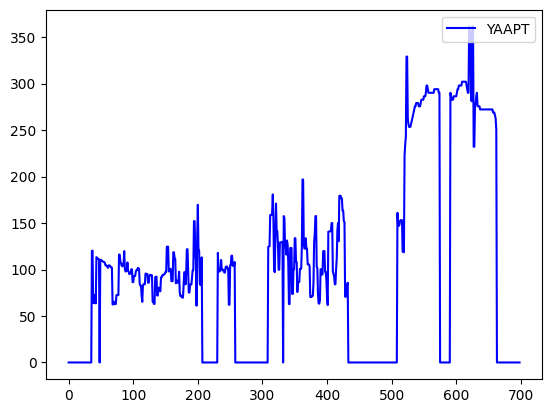

ok


In [ ]:
# sf.write('apv.wav',new_zapis,fs)
signal = basic.SignalObj(new_zapis, fs)
pitchY = pYAAPT.yaapt(signal,
                      median_value=3, #23
                      bp_forder = 160,
                      shc_numharms = 3,
                      nccf_maxcands = 4,
                      nccf_thresh2 = 1,
                      nlfer_thresh1 = 0.26, # voiced / unvoiced 0.26
                      shc_thresh1 = 12,
                      shc_thresh2 = 0.7,
                      dp_w2=2.5,
                      dp_w4=0.3)

# pYAAPT.yaapt(signal, frame_length=40, tda_frame_length=40, f0_min=50, f0_max=1200,bp_low=50,bp_high=900,median_value=49,dp_w2=1,dp_w4=0.5)

x = pitchY.samp_values
plt.plot(x, label='YAAPT', color='blue')
plt.legend(loc="upper right")
plt.show()
print("ok")


In [ ]:
def get_top_values_n(raw_data, n):
    tops_values = raw_data
    for _ in range(n):
        midpoints = get_midpoints(tops_values)
        tops = get_plot_tops(get_midpoints(tops_values), tops_values)
        tops_values = [i[1] for i in tops]
    return midpoints, tops

# Максимум 8 итераций
for iteration in range(1, 8):
    mids, tops = get_top_values_n(x, iteration)
    tvals = [i[1] for i in tops]
    tnums = [i[0] for i in tops]
    print("iteration no.", iteration, len(tops))
    if len(tops) < 50:
        break

iteration no. 1 136
iteration no. 2 74
iteration no. 3 47


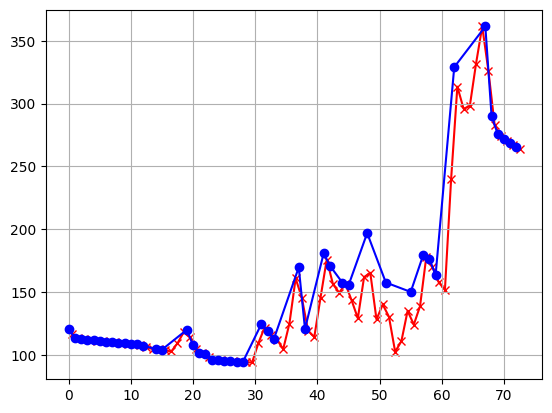

In [ ]:
plt.plot(tnums, tvals, marker="o", color='b', zorder=2)
plt.plot(list([(i+1 + i) / 2 for i in range(len(mids))]), mids, marker="x", color='r', zorder=1)
plt.grid(True)
plt.show()